# Gym toolkit : FrozenLake

In [1]:
import gym

In [3]:
env = gym.make("FrozenLake-v1")

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [7]:
env.reset()  # Reset the environment to initialize the state
env.render()  # Now you can render the environment

/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


In [9]:
print(env.observation_space)

Discrete(16)


In [10]:
print(env.action_space)

Discrete(4)


In [11]:
print(env.P[0][2])

[(0.3333333333333333, 4, 0.0, False), (0.3333333333333333, 1, 0.0, False), (0.3333333333333333, 0, 0.0, False)]


In [12]:
print(env.P[3][1])

[(0.3333333333333333, 2, 0.0, False), (0.3333333333333333, 7, 0.0, True), (0.3333333333333333, 3, 0.0, False)]


# Cart Pole Balancing with Random Policy

In [13]:
import gym
env = gym.make('CartPole-v0')

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [14]:
num_episodes = 100
num_timesteps = 50

In [15]:
#for each episode
for i in range(num_episodes):

    #set the Return to 0
    Return = 0
    #initialize the state by resetting the environment
    state = env.reset()

    #for each step in the episode
    for t in range(num_timesteps):
        #render the environment
        env.render()

        #randomly select an action by sampling from the environment
        random_action = env.action_space.sample()

        #perform the randomly selected action
        next_state, reward, done, info = env.step(random_action)

        #update the return
        Return = Return + reward

        #if the next state is a terminal state then end the episode
        if done:
            break
    #for every 10 episodes, print the return (sum of rewards)
    if i%10==0:
        print('Episode: {}, Return: {}'.format(i, Return))


/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode: 0, Return: 22.0
Episode: 10, Return: 12.0
Episode: 20, Return: 14.0
Episode: 30, Return: 12.0
Episode: 40, Return: 11.0
Episode: 50, Return: 20.0
Episode: 60, Return: 18.0
Episode: 70, Return: 20.0
Episode: 80, Return: 15.0
Episode: 90, Return: 17.0


In [16]:
env.close()

# Solving the Frozen Lake Problem with Value Iteration

In [26]:
!apt-get install -y xvfb x11-utils
!pip install PyOpenGL
!pip install PyOpenGL-accelerate
!pip install gym[all]==0.17.*
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install colabgymrender
!pip install pyvirtualdisplay

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 libxtst6 libxxf86dga1 x11-xkb-utils xfonts-base
  xfonts-encodings xfonts-utils xserver-common
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 libxtst6 libxxf86dga1 x11-utils x11-xkb-utils xfonts-base
  xfonts-encodings xfonts-utils xserver-common xvfb
0 upgraded, 12 newly installed, 0 to remove and 45 not upgraded.
Need to get 8,045 kB of archives.
After this operation, 12.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfontenc1 amd64 1:1.1.4-1build3 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxfont2 amd64 1:2.0.5-1build1 [94.5 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxkbfile1 amd64 1:1.1.0-1build3 [71.8 kB]
Get:4 http://archive.ubuntu.

In [27]:
import gym
import numpy as np

In [28]:
env = gym.make('FrozenLake-v1')

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [29]:
env.reset()

0

In [30]:
env.render()

/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


In [31]:
def value_iteration(env):

    #set the number of iterations
    num_iterations = 1000

    #set the threshold number for checking the convergence of the value function
    threshold = 1e-20

    #we also set the discount factor
    gamma = 1.0

    #now, we will initialize the value table, with the value of all states to zero
    value_table = np.zeros(env.observation_space.n)

    #for every iteration
    for i in range(num_iterations):

        #update the value table, that is, we learned that on every iteration, we use the updated value
        #table (state values) from the previous iteration
        updated_value_table = np.copy(value_table)

        #now, we compute the value function (state value) by taking the maximum of Q value.

        #thus, for each state, we compute the Q values of all the actions in the state and then
        #we update the value of the state as the one which has maximum Q value as shown below:
        for s in range(env.observation_space.n):

            Q_values = [sum([prob*(r + gamma * updated_value_table[s_])
                             for prob, s_, r, _ in env.P[s][a]])
                                   for a in range(env.action_space.n)]

            value_table[s] = max(Q_values)

        #after computing the value table, that is, value of all the states, we check whether the
        #difference between value table obtained in the current iteration and previous iteration is
        #less than or equal to a threshold value if it is less then we break the loop and return the
        #value table as our optimal value function as shown below:

        if (np.sum(np.fabs(updated_value_table - value_table)) <= threshold):
             break

    return value_table

In [32]:
def extract_policy(value_table):

    #set the discount factor
    gamma = 1.0

    #first, we initialize the policy with zeros, that is, first, we set the actions for all the states to
    #be zero
    policy = np.zeros(env.observation_space.n)

    #now, we compute the Q function using the optimal value function obtained from the
    #previous step. After computing the Q function, we can extract policy by selecting action which has
    #maximum Q value. Since we are computing the Q function using the optimal value
    #function, the policy extracted from the Q function will be the optimal policy.

    #As shown below, for each state, we compute the Q values for all the actions in the state and
    #then we extract policy by selecting the action which has maximum Q value.

    #for each state
    for s in range(env.observation_space.n):

        #compute the Q value of all the actions in the state
        Q_values = [sum([prob*(r + gamma * value_table[s_])
                             for prob, s_, r, _ in env.P[s][a]])
                                   for a in range(env.action_space.n)]

        #extract policy by selecting the action which has maximum Q value
        policy[s] = np.argmax(np.array(Q_values))

    return policy

In [33]:
optimal_value_function = value_iteration(env=env)

In [34]:
optimal_policy = extract_policy(optimal_value_function)

In [35]:
print(optimal_policy)

[0. 3. 3. 3. 0. 0. 0. 0. 3. 1. 0. 0. 0. 2. 1. 0.]


In [41]:
!pip install gymnasium

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 7.5 MB/s eta 0:00:00


In [42]:
import gymnasium as gym
import numpy as np
import random
import matplotlib.pyplot as plt

import cv2
from google.colab.patches import cv2_imshow

import PIL.Image
from IPython.display import Image

In [43]:
from gymnasium.envs.toy_text.frozen_lake import generate_random_map

array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
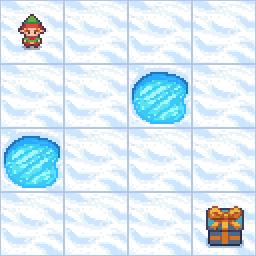

In [44]:
env = gym.make(
    "FrozenLake-v1",
    is_slippery = False,        # Whether a transition occurs stochastically (True) or deterministically (False)
    render_mode = 'rgb_array',
    desc = generate_random_map(
        size=4,                 # Frozen Lake grid size (map_size x map_size)
        p = 0.79,                # Probability that a tile is frozen
        seed=830                # A fixed seed produces always the same map.
    )
)

state, info = env.reset()
env.render()